# start

In [70]:
PRFX = 'MelEDA0712A1'
PRFX_PREP = 'MelPrp0909B384'

# setup

In [76]:
import albumentations as A


from pathlib import Path
import pickle
import pandas as pd
import random
import os
import numpy as np
import matplotlib.pyplot as plt
import inspect

from torch.utils.data import Dataset, DataLoader

from torchvision import transforms
from PIL import Image
import cv2


def augment_and_show(aug, img):
    img = aug(image=img)['image']
    plt.imshow(img)
    plt.show()

def get_img(fnm):
    img = cv2.imread(fnm)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    return img

# augs all

In [72]:
dir(A)

['BasicIAATransform',
 'BasicTransform',
 'BboxParams',
 'BboxProcessor',
 'Blur',
 'CLAHE',
 'CenterCrop',
 'ChannelDropout',
 'ChannelShuffle',
 'CoarseDropout',
 'Compose',
 'Crop',
 'CropNonEmptyMaskIfExists',
 'Cutout',
 'Downscale',
 'DualIAATransform',
 'DualTransform',
 'ElasticTransform',
 'Equalize',
 'FancyPCA',
 'Flip',
 'FromFloat',
 'GaussNoise',
 'GaussianBlur',
 'GlassBlur',
 'GridDistortion',
 'GridDropout',
 'HorizontalFlip',
 'HueSaturationValue',
 'IAAAdditiveGaussianNoise',
 'IAAAffine',
 'IAACropAndPad',
 'IAAEmboss',
 'IAAFliplr',
 'IAAFlipud',
 'IAAPerspective',
 'IAAPiecewiseAffine',
 'IAASharpen',
 'IAASuperpixels',
 'ISONoise',
 'ImageCompression',
 'ImageOnlyIAATransform',
 'ImageOnlyTransform',
 'InvertImg',
 'JpegCompression',
 'KeypointParams',
 'Lambda',
 'LongestMaxSize',
 'MaskDropout',
 'MedianBlur',
 'MotionBlur',
 'MultiplicativeNoise',
 'NoOp',
 'Normalize',
 'OneOf',
 'OneOrOther',
 'OpticalDistortion',
 'PadIfNeeded',
 'Posterize',
 'RGBShift',
 

In [73]:
p_cmp = '../input/siim-isic-melanoma-classification/'
p_prp = f'../output/{PRFX_PREP}'
dftrn = pd.read_csv(f'{p_prp}/train_all.csv') 
dftst = pd.read_csv(f'{p_prp}/test.csv')

../output/MelPrp0909B384/andrewmvd--isic-2019/ISIC_2019_Training_Input/ISIC_2019_Training_Input/ISIC_0013427_downsampled.jpg


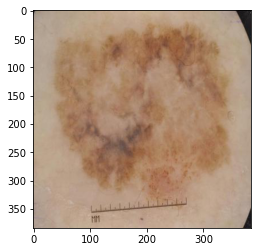

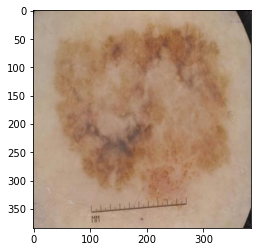

In [74]:
fnm = np.random.choice(dftrn.im_pth)
print(fnm)
x = Image.open(fnm)
plt.imshow(x);
plt.show()
x.size

x = get_img(fnm)
plt.imshow(x);

BasicIAATransform

BasicTransform

__init__() got an unexpected keyword argument 'p'
__init__() got an unexpected keyword argument 'p'
Blur


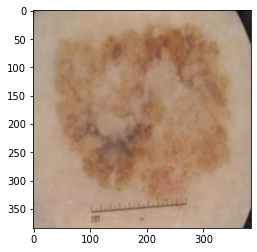

CLAHE


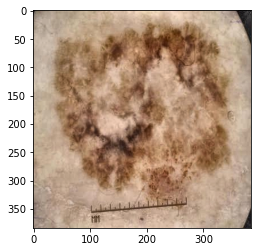

__init__() missing 2 required positional arguments: 'height' and 'width'
ChannelDropout


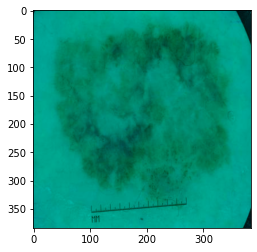

ChannelShuffle


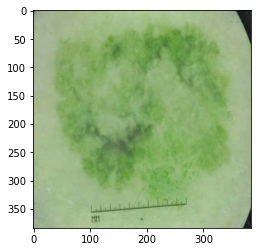

CoarseDropout


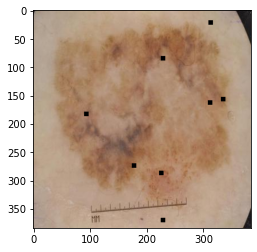

__init__() missing 1 required positional argument: 'transforms'
Crop
Values for crop should be non negative and equal or smaller than image sizes(x_min = 0, y_min = 0, x_max = 1024, y_max = 1024height = 384, width = 384)
__init__() missing 2 required positional arguments: 'height' and 'width'
Cutout


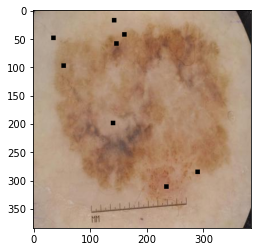

Downscale


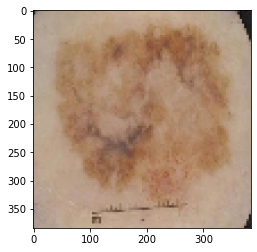

DualIAATransform


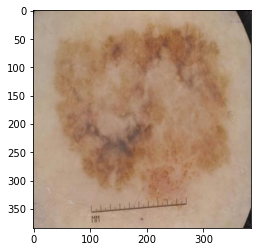

DualTransform

ElasticTransform


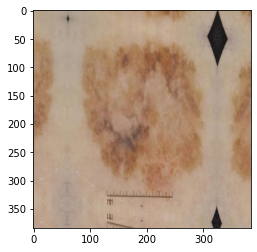

Equalize


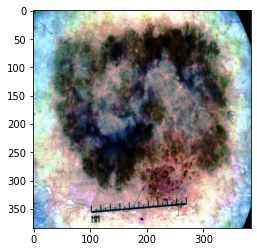

FancyPCA


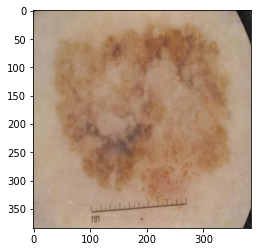

Flip


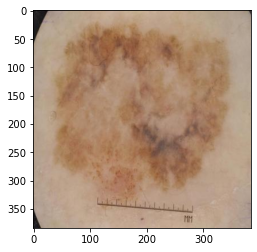

FromFloat


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


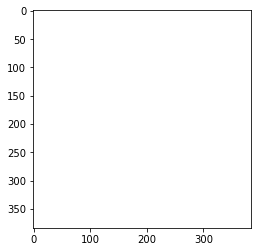

GaussNoise


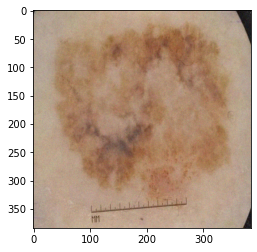

GaussianBlur


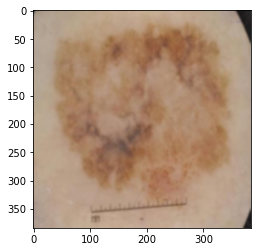

GlassBlur


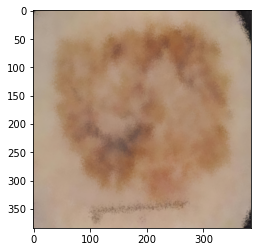

GridDistortion


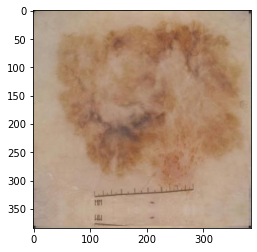

GridDropout


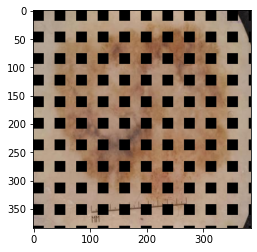

HorizontalFlip


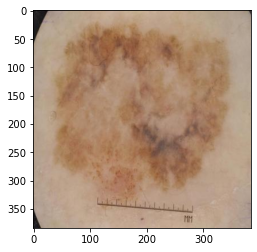

HueSaturationValue


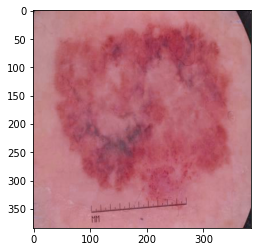

IAAAdditiveGaussianNoise


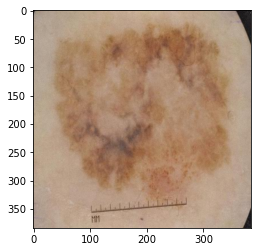

IAAAffine


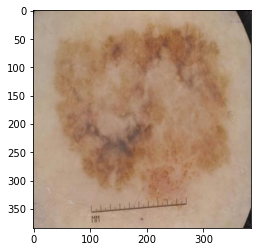

IAACropAndPad


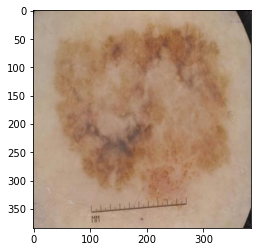

IAAEmboss


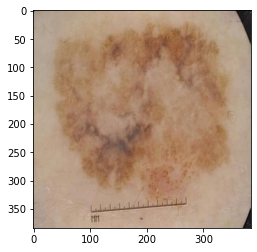

IAAFliplr


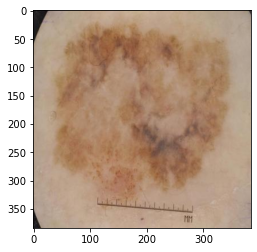

IAAFlipud


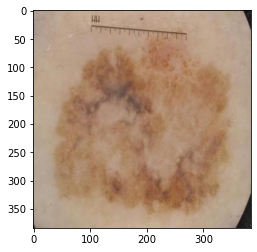

IAAPerspective


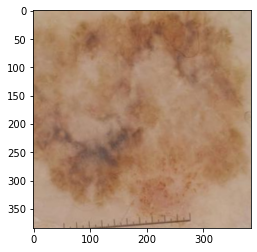

IAAPiecewiseAffine


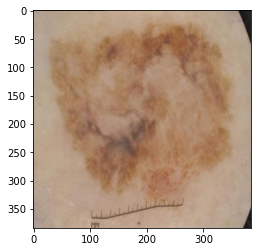

IAASharpen


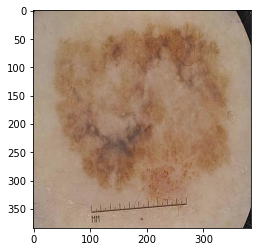

IAASuperpixels


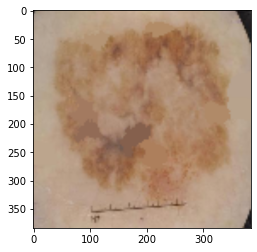

ISONoise


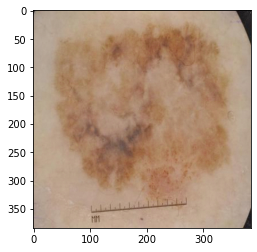

ImageCompression


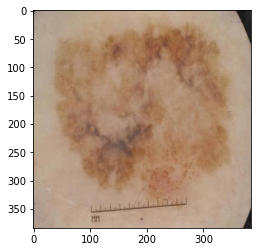

ImageOnlyIAATransform


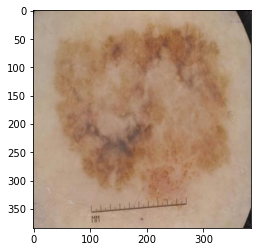

ImageOnlyTransform

InvertImg


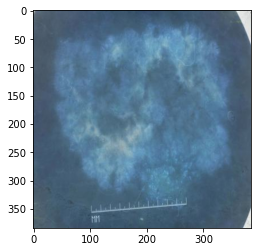

JpegCompression


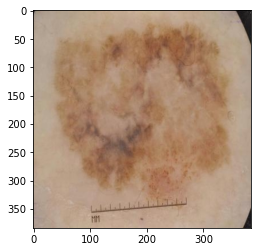

__init__() got an unexpected keyword argument 'p'
Lambda


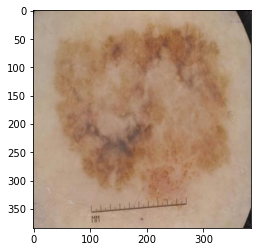

LongestMaxSize


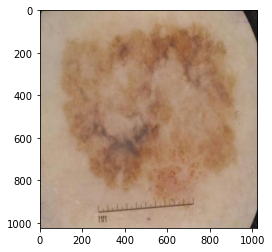

MaskDropout
MaskDropout requires ['mask']
MedianBlur


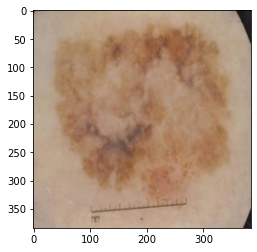

MotionBlur


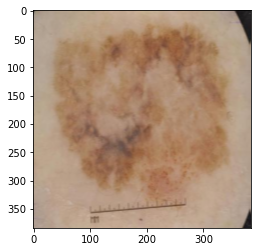

MultiplicativeNoise


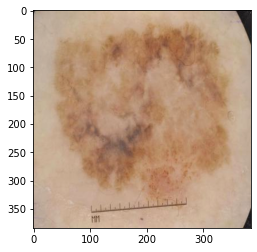

NoOp


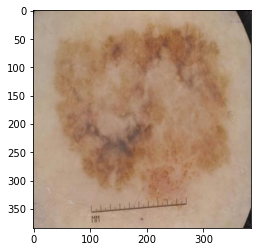

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Normalize


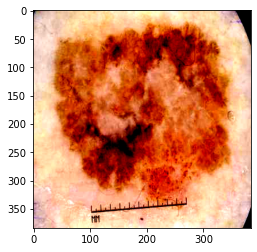

__init__() missing 1 required positional argument: 'transforms'
OneOrOther
'NoneType' object is not callable
OpticalDistortion


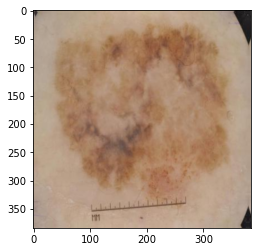

PadIfNeeded


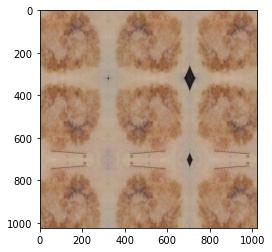

Posterize


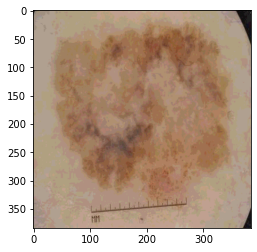

RGBShift


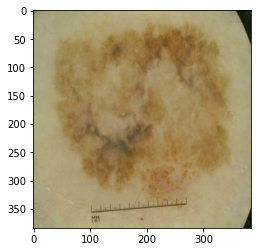

RandomBrightness


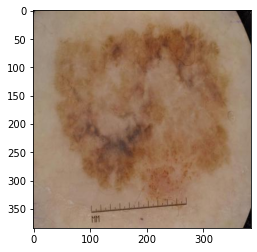

RandomBrightnessContrast


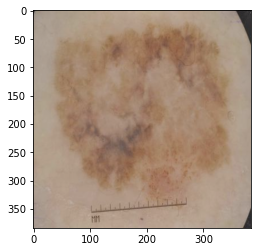

RandomContrast


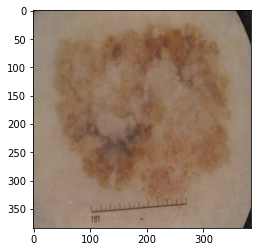

__init__() missing 2 required positional arguments: 'height' and 'width'
RandomCropNearBBox
RandomCropNearBBox requires ['cropping_bbox']
RandomFog


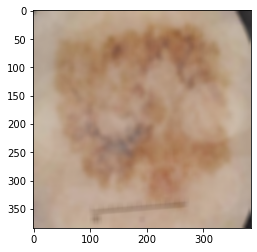

RandomGamma


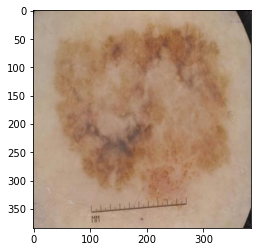

RandomGridShuffle


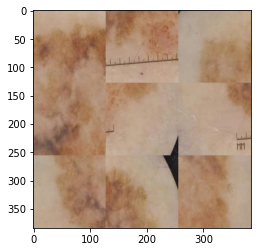

RandomRain


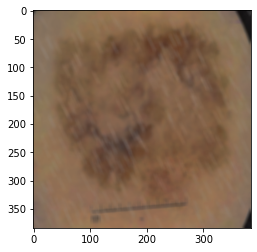

__init__() missing 2 required positional arguments: 'height' and 'width'
RandomRotate90


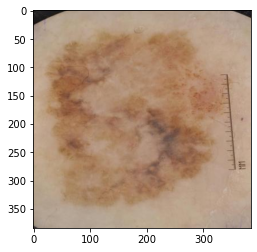

RandomScale


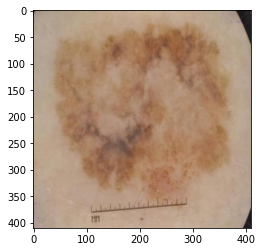

RandomShadow


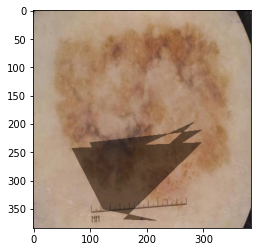

__init__() missing 2 required positional arguments: 'height' and 'width'
__init__() missing 3 required positional arguments: 'min_max_height', 'height', and 'width'
RandomSnow


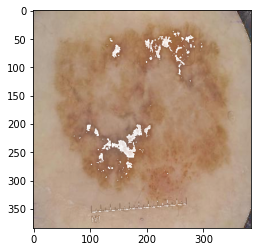

RandomSunFlare


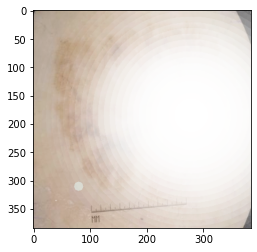

__init__() missing 1 required positional argument: 'transforms'
__init__() missing 2 required positional arguments: 'height' and 'width'
Rotate


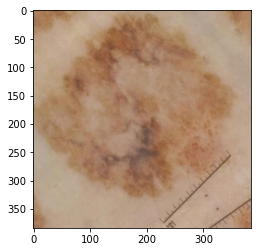

ShiftScaleRotate


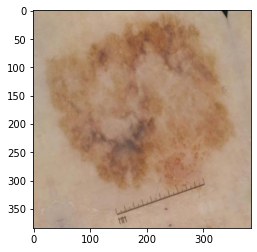

SmallestMaxSize


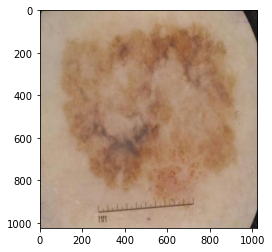

Solarize


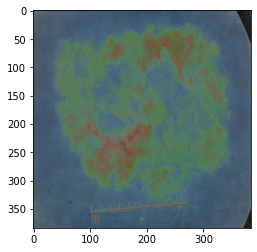

ToFloat


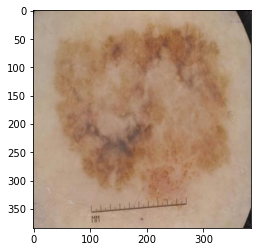

ToGray


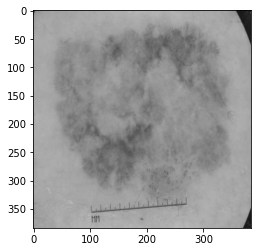

ToSepia


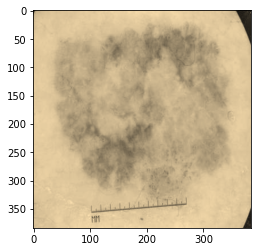

Transpose


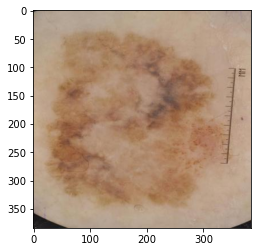

VerticalFlip


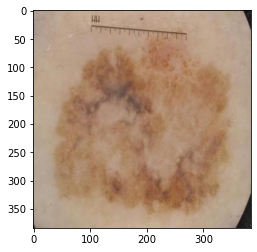

'dict' object is not callable
'str' object is not callable
'NoneType' object is not callable
'str' object is not callable
'SourceFileLoader' object is not callable
'str' object is not callable
'str' object is not callable
'list' object is not callable
'ModuleSpec' object is not callable
'str' object is not callable
'_Feature' object is not callable
'module' object is not callable
calculate_bbox_area() got an unexpected keyword argument 'p'
convert_bbox_from_albumentations() got an unexpected keyword argument 'p'
convert_bbox_to_albumentations() got an unexpected keyword argument 'p'
convert_bboxes_from_albumentations() got an unexpected keyword argument 'p'
convert_bboxes_to_albumentations() got an unexpected keyword argument 'p'
'module' object is not callable
denormalize_bbox() got an unexpected keyword argument 'p'
denormalize_bboxes() got an unexpected keyword argument 'p'
filter_bboxes_by_visibility() got an unexpected keyword argument 'p'
from_dict() got an unexpected keyword arg

In [77]:
for aug_nm, Aug in inspect.getmembers(A):
    try:
        aug = Aug(p=1)
        print(aug_nm)
        augment_and_show(aug, x)
    except Exception as e:
        print(e)

# shape

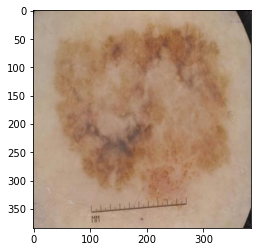

In [78]:
plt.imshow(x)

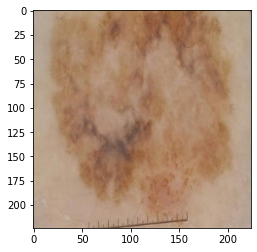

In [89]:
aug = A.RandomResizedCrop(224, 224, scale=(0.75, 1))
augment_and_show(aug, x)

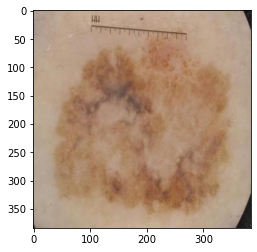

In [90]:
aug = A.Flip(p=1)
augment_and_show(aug, x)

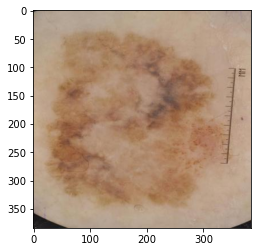

In [91]:
aug = A.Transpose(p=1)
augment_and_show(aug, x)

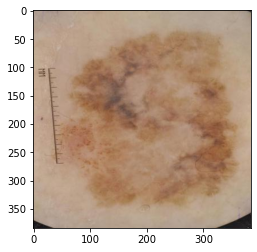

In [92]:
aug = A.RandomRotate90(p=1)
augment_and_show(aug, x)

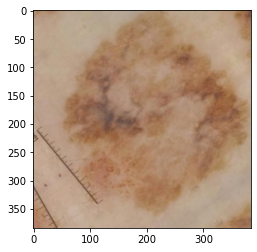

In [93]:
aug = A.Rotate(limit=360, p=1)
augment_and_show(aug, x)

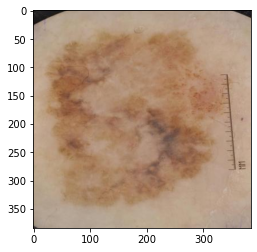

In [94]:
aug = A.RandomRotate90(p=1)
augment_and_show(aug, x)

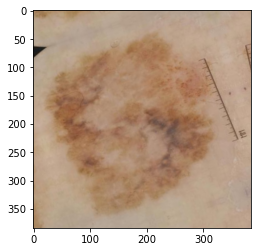

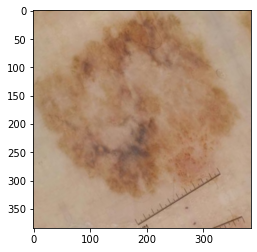

In [95]:
aug = A.ShiftScaleRotate(rotate_limit=360, p=1)
augment_and_show(aug, x)
aug = A.ShiftScaleRotate(shift_limit=0.01, scale_limit=0.1, rotate_limit=360, p=1)
augment_and_show(aug, x)

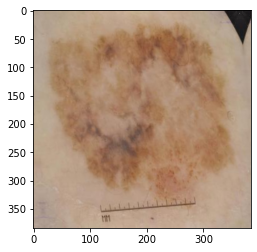

In [96]:
aug = A.IAAAffine(shear=10, p=1)
augment_and_show(aug, x)

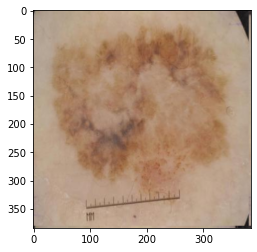

In [97]:
aug = A.GridDistortion(p=1)
augment_and_show(aug, x)

# pixels

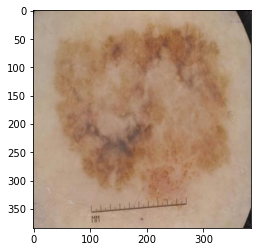

In [98]:
plt.imshow(x)

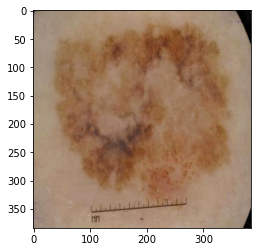

In [105]:
aug = A.RandomBrightnessContrast(p=1)
augment_and_show(aug, x)

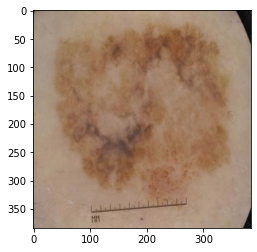

In [134]:
aug = A.HueSaturationValue(
    hue_shift_limit=5,
    sat_shift_limit=5,
    p=1)
augment_and_show(aug, x)

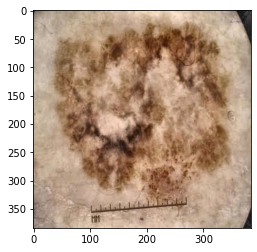

In [143]:
aug = A.CLAHE(p=1)
augment_and_show(aug, x)

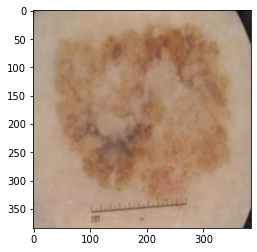

In [146]:
aug = A.Blur(p=1)
augment_and_show(aug, x)

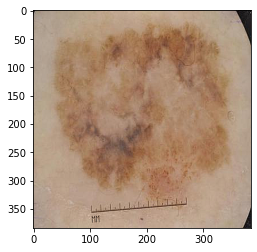

In [148]:
aug = A.IAASharpen(p=1)
augment_and_show(aug, x)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


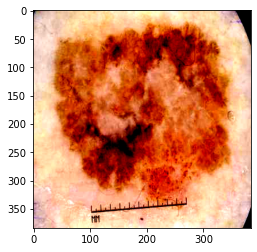

In [150]:
aug = A.Normalize()
augment_and_show(aug, x)

# cutout

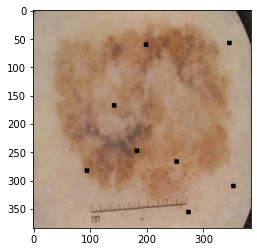

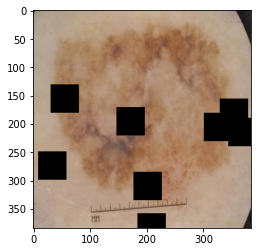

In [177]:
aug = A.Cutout(p=1)
augment_and_show(aug, x)

aug = A.Cutout(    
    num_holes=8,
    max_h_size=50,
    max_w_size=50,p=1)
augment_and_show(aug, x)

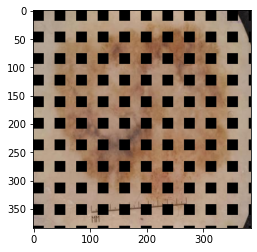

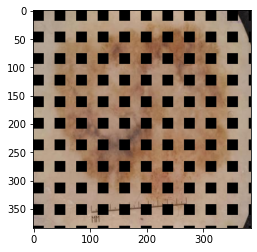

In [161]:
aug = A.GridDropout(ratio=0.5, p=1)
augment_and_show(aug, x)
aug = A.GridDropout(ratio=0.5, p=1)
augment_and_show(aug, x)